In [6]:
Feature_Engineering_Unstructured_Data_NASA_Audio_Files

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

from google.colab import drive
import os


In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
folder_path = '/content/drive/MyDrive/NASA_Files'

# Get list of all the NASA files
files = os.listdir(folder_path)

# Print list of NASA files
print(files)

['578359main_kepler_star_KIC7671081B.mp3', 'whistler.mp3', '578358main_kepler_star_KIC12268220C.mp3', 'jno-E45-LFRH-22-272-0836-1006-fnl.wav']


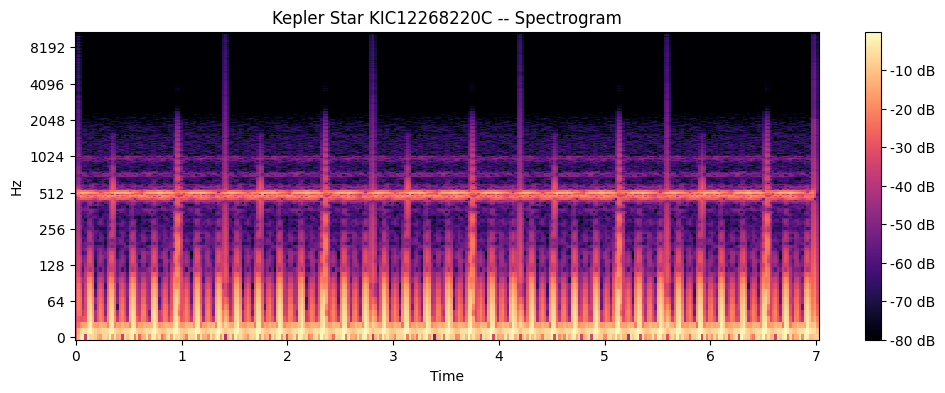

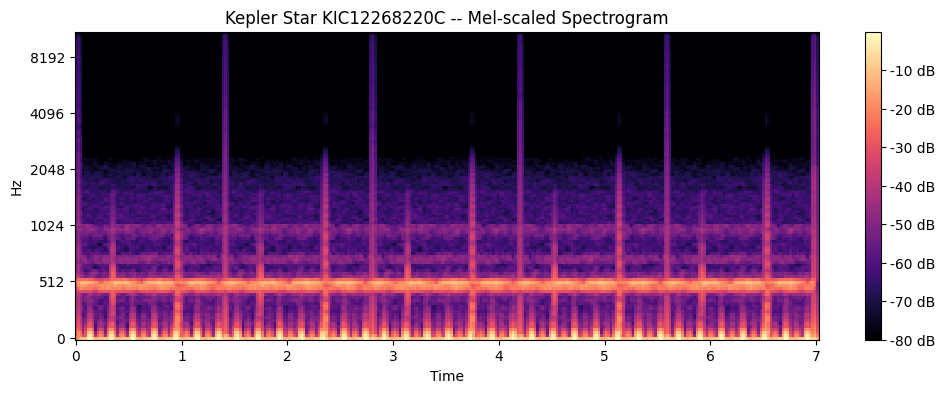

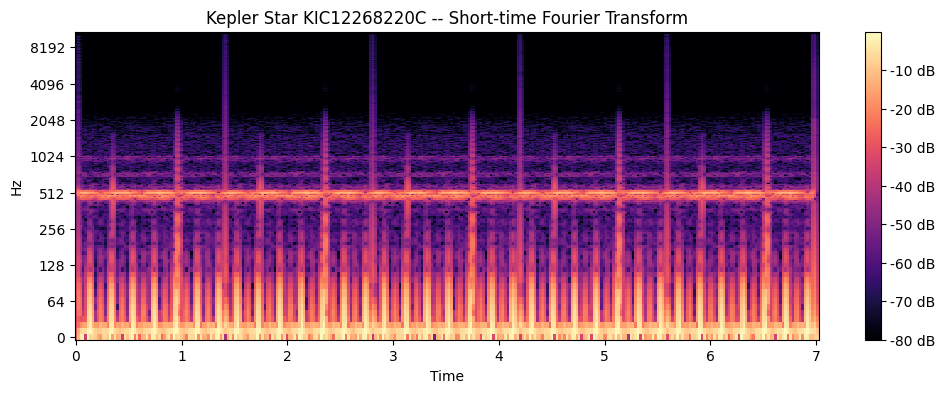

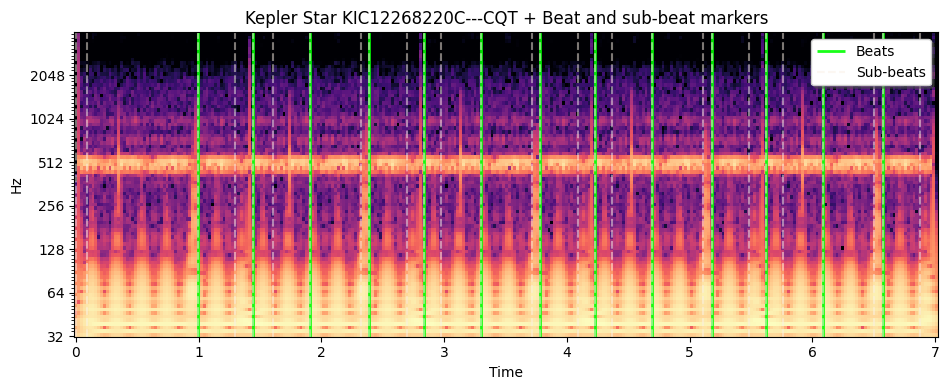

*********************************************************************************************************


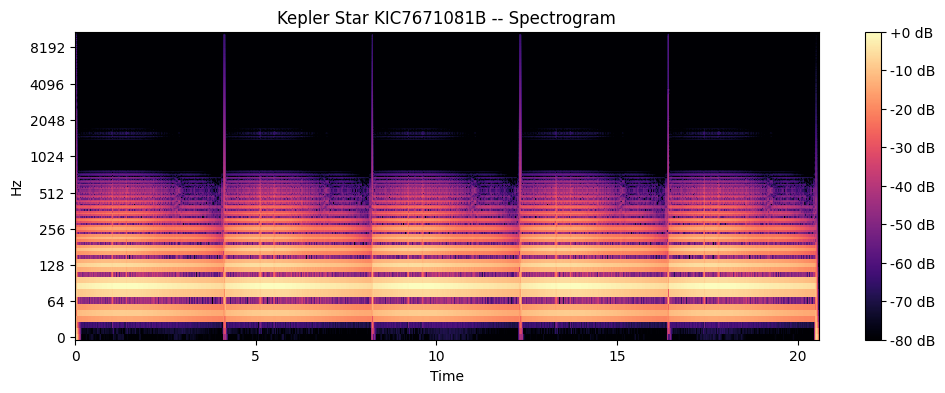

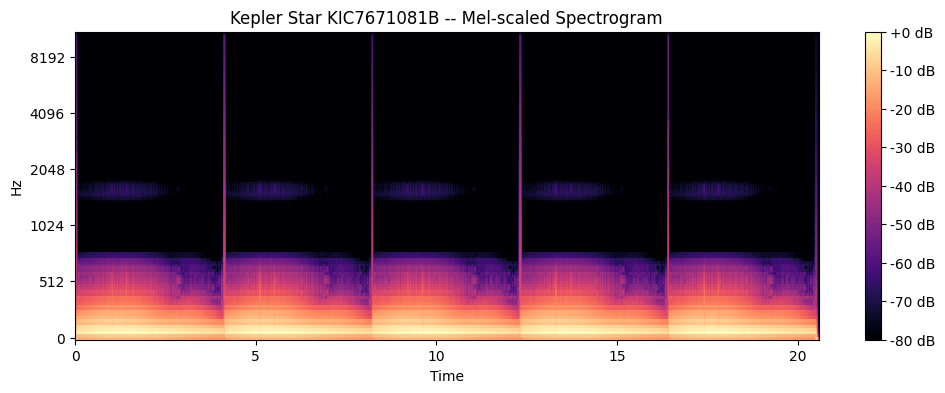

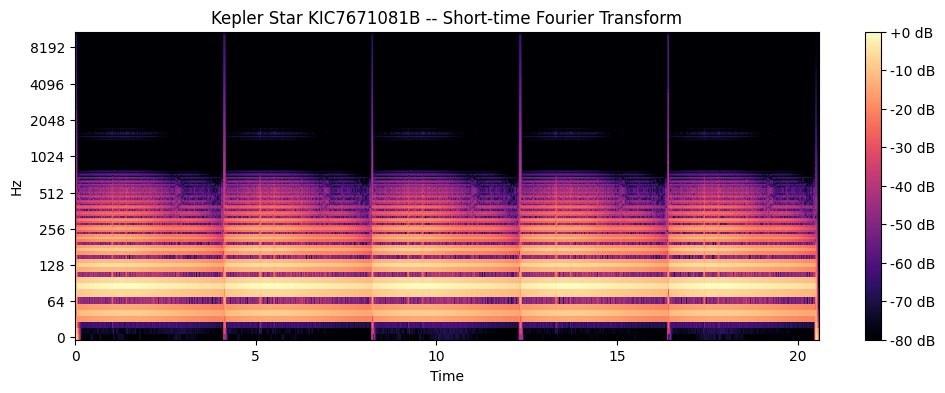

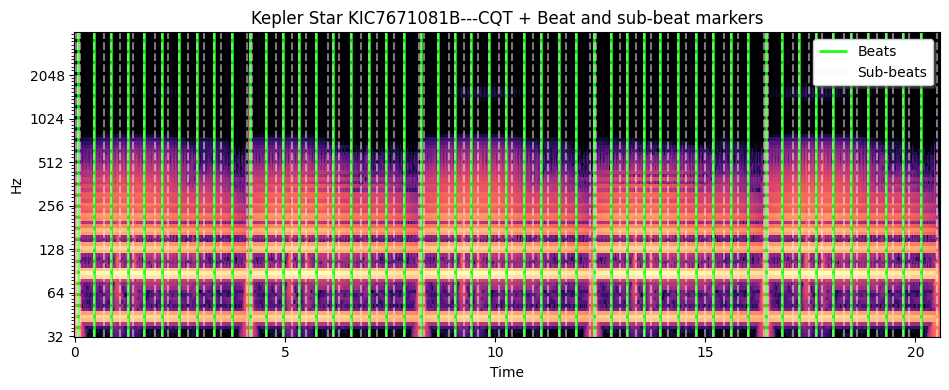

*********************************************************************************************************


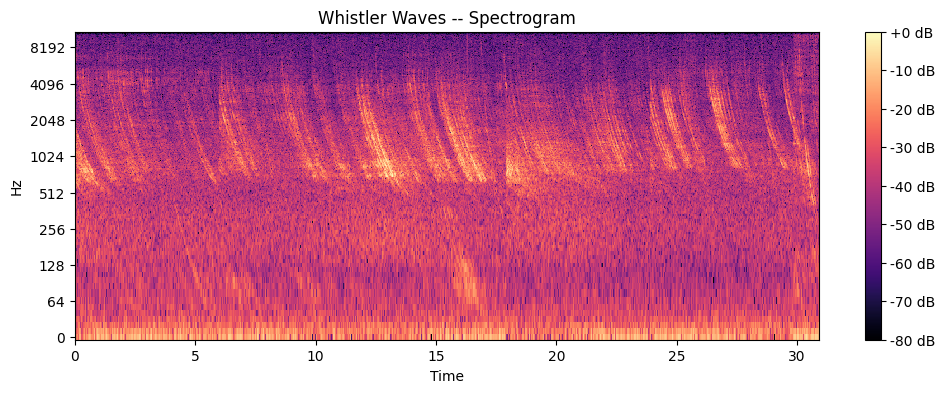

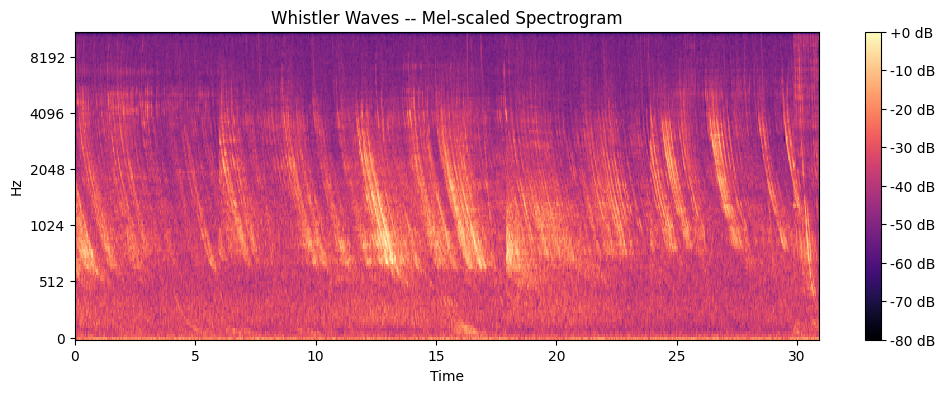

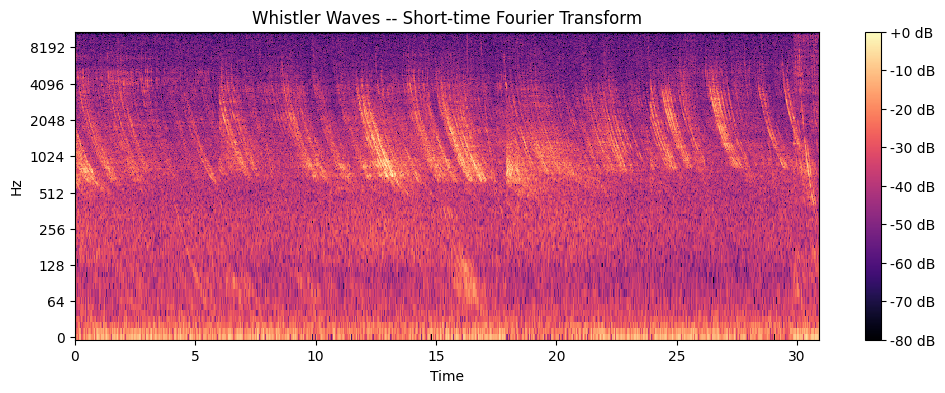

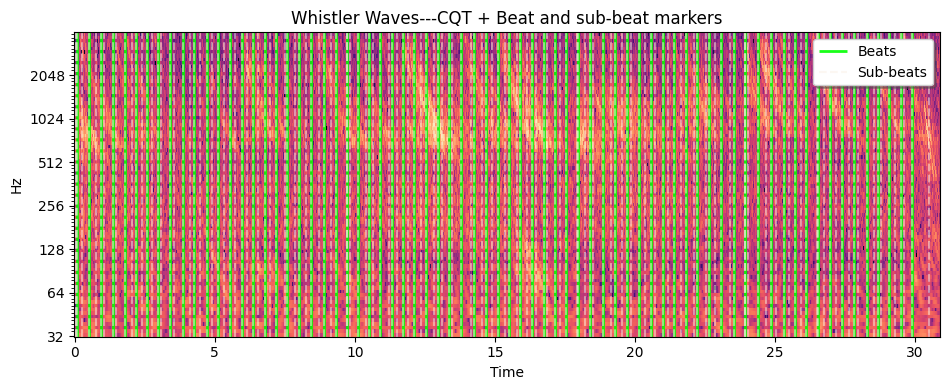

*********************************************************************************************************


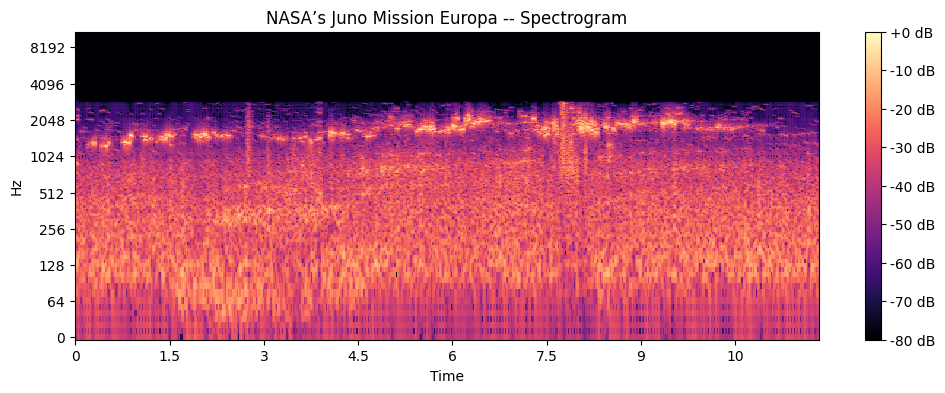

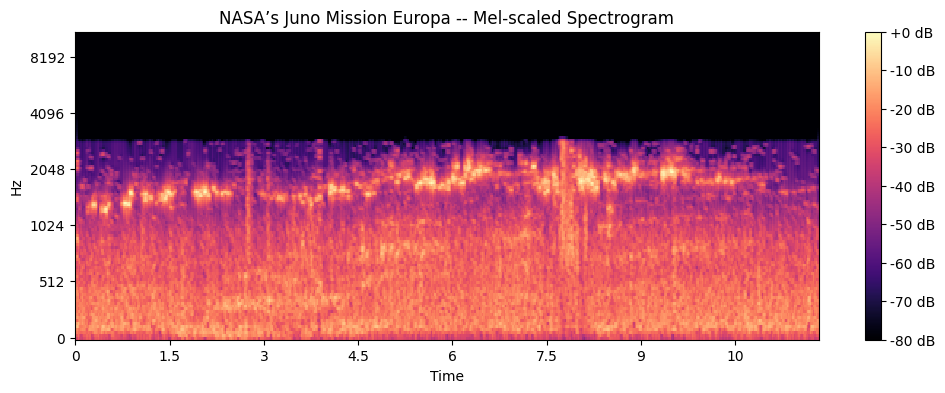

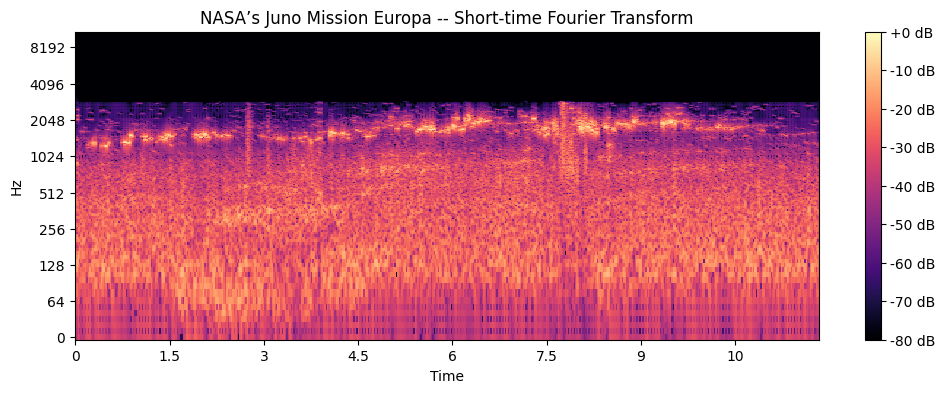

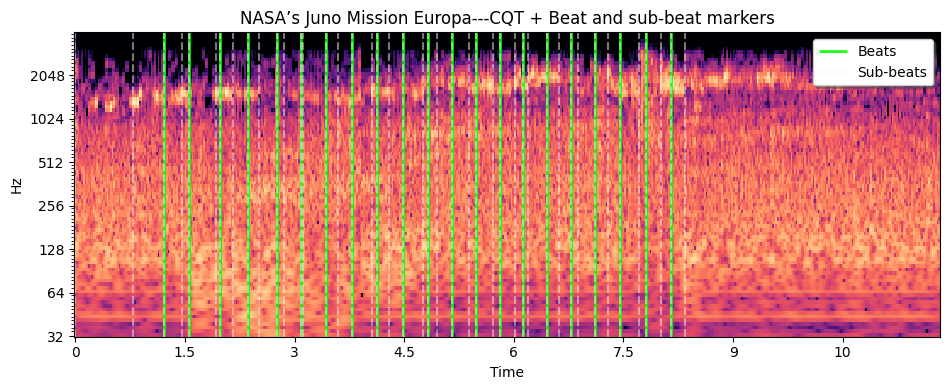

*********************************************************************************************************


In [10]:
files=['/content/drive/MyDrive/NASA_Files/578358main_kepler_star_KIC12268220C.mp3','/content/drive/MyDrive/Spring2023/CMPE-274 (Chandra-Vippulpati - Business Intelligence Technologies)/HW/HW7/NASA_Files/578359main_kepler_star_KIC7671081B.mp3','/content/drive/MyDrive/Spring2023/CMPE-274 (Chandra-Vippulpati - Business Intelligence Technologies)/HW/HW7/NASA_Files/whistler.mp3','/content/drive/MyDrive/Spring2023/CMPE-274 (Chandra-Vippulpati - Business Intelligence Technologies)/HW/HW7/NASA_Files/jno-E45-LFRH-22-272-0836-1006-fnl.wav']

names=['Kepler Star KIC12268220C','Kepler Star KIC7671081B','Whistler Waves','NASA’s Juno Mission Europa']


# Load the audio file


for i in range(len(files)):
    audio_file = files[i]
    name=names[i]
    y, sr = librosa.load(audio_file)

    # 1. Display a spectrogram
    plt.figure(figsize=(12, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(names[i] +' -- Spectrogram')
    plt.show()
    # 2. Compute a mel-scaled spectrogram and display it
    plt.figure(figsize=(12, 4))
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(names[i] +' -- Mel-scaled Spectrogram')
    plt.show()
    # 3. Short-time Fourier transform (STFT)
    stft = librosa.stft(y)
    stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(names[i] +' -- Short-time Fourier Transform')
    plt.show()


    # 4,5 -> Compute CQT with beats and sub beats

    


    tempo, beats = librosa.beat.beat_track(y=y, sr=sr, hop_length=512)
    beat_times = librosa.frames_to_time(beats, sr=sr, hop_length=512)
    cqt = np.abs(librosa.cqt(y, sr=sr, hop_length=512))
    subseg = librosa.segment.subsegment(cqt, beats, n_segments=2)
    subseg_t = librosa.frames_to_time(subseg, sr=sr, hop_length=512)


    plt.figure(figsize=(9.6, 4))
    librosa.display.specshow(librosa.amplitude_to_db(cqt,ref=np.max),y_axis='cqt_hz', x_axis='time')
    lims = plt.gca().get_ylim()
    plt.vlines(beat_times, lims[0], lims[1], color='lime', alpha=0.9,linewidth=2, label='Beats')
    plt.vlines(subseg_t, lims[0], lims[1], color='linen', linestyle='--',linewidth=1.5, alpha=0.5, label='Sub-beats')
    plt.legend(frameon=True, shadow=True)
    plt.title(names[i] + '---CQT + Beat and sub-beat markers')
    plt.tight_layout()
    plt.show()


    print("*********************************************************************************************************")